# BIODIVERSITY IN NATIONAL PARKS #


## Introduction ##

This goal of this project is to analyze biodiversity data from these four National Parks during a one week period.

- Bryce National Park
- Great Smoky Mountains National Park
- Yellowstone National Park
- Yosemite National Park

This project will analyze data, and seek to find the answers to: 
    
 -  How many species were observed this week, at these four National Parks?
 -  What are the conservation statuses of these species?
 -  What category of species is most protected?

## Data sources: ##
### Both Observations.csv and Species_info.csv was provided by Codecademy.com. ###
### The data for this project is inspired by real data, but is ### 
# <div class="alert-danger">mostly fictional.</div> #


from IPython.display import Image
Image(url="Yosemite.jpeg", width=300, height=300) 

In [13]:
## Import python modules ##

In [14]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

from scipy.stats import chi2_contingency

from itertools import chain
import string

## Load in data ##
### There are 2 data files to load in. ###

### species data set ###

In [15]:
species = pd.read_csv('species_info.csv',encoding='utf-8')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


### observations data set ###

In [16]:
observations = pd.read_csv('observations.csv', encoding='utf-8')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


## Scope the data sets. ##

In [17]:
print(f"species shape: {species.shape}")
print(f"observations shape: {observations.shape}")

species shape: (5824, 4)
observations shape: (23296, 3)


### There are 5,824 rows of data in the "species" data set, and 4 columns. ###
### There are 23,296 rows of data in the "observations" data set, and 3 columns. ###

In [18]:
print(species.columns)
print(species.dtypes)

Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')
category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object


In [19]:
print(observations.columns)
print(observations.dtypes)

Index(['scientific_name', 'park_name', 'observations'], dtype='object')
scientific_name    object
park_name          object
observations        int64
dtype: object


### Convert the observations column(in the observations dataset) to integer.

In [20]:
observations["observations"] = pd.to_numeric(observations['observations'])
print(observations.dtypes)

scientific_name    object
park_name          object
observations        int64
dtype: object


### How many species have been observed in these four National Parks this week? ###

In [21]:
print("There have been " + str(species.scientific_name.nunique()) + " number of species observed in these four National Parks this week." + '\n')

There have been 5541 number of species observed in these four National Parks this week.



In [26]:
print(observations.scientific_name)

0                             Vicia benghalensis
1                                 Neovison vison
2                              Prunus subcordata
3                           Abutilon theophrasti
4                       Githopsis specularioides
                          ...                   
23291                       Croton monanthogynus
23292                   Otospermophilus beecheyi
23293    Heterotheca sessiliflora ssp. echioides
23294                       Dicranella rufescens
23295                             Cucurbita pepo
Name: scientific_name, Length: 23296, dtype: object


In [28]:
print("There are " + str(species.category.nunique()) + " categories of species in this dataset.")

There are 7 categories of species in this dataset.


### How many species are there in each of these categories?  ###

In [29]:
species.groupby("category").size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

### How many National Parks are there in the dataset, and what are their names? ###

In [30]:
print("There are " + str(observations.park_name.nunique()) + " National Parks in this dataset.")

There are 4 National Parks in this dataset.


In [31]:
observations.groupby("park_name").size()

park_name
Bryce National Park                    5824
Great Smoky Mountains National Park    5824
Yellowstone National Park              5824
Yosemite National Park                 5824
dtype: int64

### There are 4 parks in the data set: ###

- Bryce National Park
- Great Smoky Mountains National Park
- Yellowstone National Park
- Yosemite National Park

### What are the conservation statuses of the species? ###

In [32]:
print("There are " + str(species.conservation_status.nunique()) + " conservation statuses.")
print("These conservation statuses are " + str(species.conservation_status.unique()))

There are 4 conservation statuses.
These conservation statuses are [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


### There are five conservation statuses. Of the five, one of them is empty data ("nan"). : ###
### We will assume that the empty data is "Not Endangered."  "nan" will have to be converted to "Not Endangered"
### when we clean the data later on. ###
- Endangered
- In Recovery
- Species of Concern
- Threatened
- nan (empty data)

### Number of species in each conservation status: ###

In [35]:
species.groupby("conservation_status").size()

conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64

### Of the species that have some level of protection, most of the species fall in to the "Species of Concern" conservation category. This is the lowest level of protection. ###

In [36]:
print(species.conservation_status)

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
5819    NaN
5820    NaN
5821    NaN
5822    NaN
5823    NaN
Name: conservation_status, Length: 5824, dtype: object


### The "NaN" shows that there is lots of missing data in this conservation_status column. ###
### Nan implies that species is not in danger. ###

# Clean the data. #

### First task will be to clean and explore the conservation_status column in species. ###

#### ___ _ ___ _ ___ _ ___ ####

## <span style="color:green;font-weight:700;font-size:20px">conservation_status</span> has 5 possible values: ##
    
> <strong>Endangered:</strong> seriously at risk of extinction 
    
> <strong>In Recovery:</strong> formerly Endangered, but currently neither in danger of extinction throughout all or a significant portion of its range 
  
> <strong>Species of Concern:</strong> declining or appear to be in need of conservation
    
> <strong>Threatened:</strong> vulnerable to endangerment in the near future 
    
> <strong>Nan</strong> values (missing data ) were detected. These values will need to be converted to "Not endangered". 

### Change Nan to 'Not Endangered'

In [63]:
species.fillna('Not Endangered', inplace=True)
species.groupby("conservation_status").size()

conservation_status
Endangered              16
In Recovery              4
Not Endangered        5633
Species of Concern     161
Threatened              10
dtype: int64

In [64]:
percent_notEndanger = (5633 * 100) / 5824
print(percent_notEndanger)

96.72046703296704


### Of the 5824 species, 5633 are not endangered. ###
### 96.7% are not endangered. ###

# Analyze the data. #

## How many species are there, in this dataset? How many of these species are endangered? ###

In [65]:
species_total = species.shape[0]
print("There are " + str(species_total) + " species total.") 

There are 5824 species total.


In [66]:
endangered_no = sum(species.conservation_status == 'Not Endangered')
print("Of the " + str(species_total) + " total amount of species, there are " + str(endangered_no) + " species that are not endangered.")

Of the 5824 total amount of species, there are 5633 species that are not endangered.


In [67]:
endangered_yes = species_total - endangered_no
print("There are " + str(endangered_yes) + " species that are endangered, and receive some level of protection.")

There are 191 species that are endangered, and receive some level of protection.


In [68]:
endangered_percent = species_total / endangered_yes * .1
print(str(round(endangered_percent,1)) + "% of the species are endangered.")

3.0% of the species are endangered.


### Of the 5824 species, only 191 are endangered. This is only 3% of the species. ####

## Show the number of species and the different categories of protection. ##

In [69]:
conservationCategory = species[species.conservation_status != "Not Endangered"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()

conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


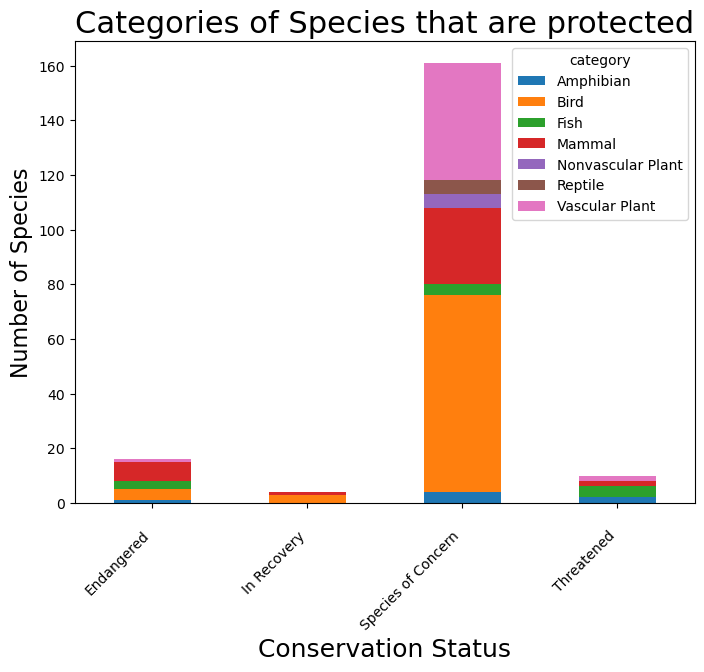

In [70]:
ax = conservationCategory.plot(kind = 'bar', figsize=(8,6), 
                               stacked=True)
ax.set_xlabel("Conservation Status", size=18)
ax.set_ylabel("Number of Species", size=16);
ax.set_title("Categories of Species that are protected", size = 22)
plt.xticks(rotation=45, ha="right")
ax.tick_params(axis='x', which='major', pad=15)


## Unprotected ##

In [71]:
unprotectedCategory = species[species.conservation_status == "Not Endangered"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()

unprotectedCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Not Endangered,73,442,116,176,328,74,4424


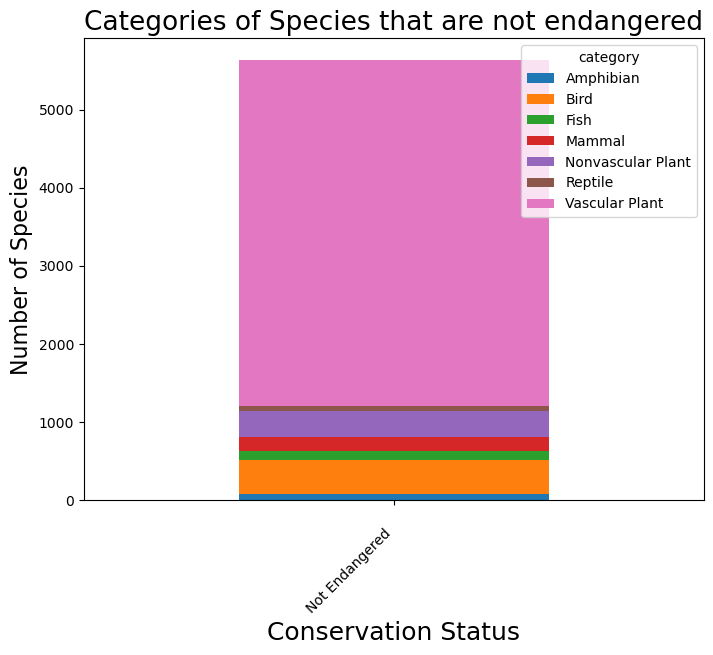

In [73]:
ax = unprotectedCategory.plot(kind = 'bar', figsize=(8,6), 
                               stacked=True)
ax.set_xlabel("Conservation Status", size=18)
ax.set_ylabel("Number of Species", size=16);
ax.set_title("Categories of Species that are not endangered", size = 19)
plt.xticks(rotation=45, ha="right")
ax.tick_params(axis='x', which='major', pad=15)

## Which category of species is most protected? ##

In [74]:
#Create a new column called 'protected' that holds all species that are protected. 

In [75]:
species['is_protected'] = species.conservation_status != 'Not Endangered'

### Here are the numbers of protected species vs unprotected. ###

In [76]:
category_counts = species.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']

category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


### Show percentages (%) of protected species vs unprotected. ... ###

In [77]:
category_counts['percent_protected'] = category_counts.protected / \
                                      (category_counts.protected + category_counts.not_protected) * 100

category_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


In [78]:
conservation_category = pd.pivot_table(
        species[species.conservation_status != "Least Concern"],
        values='scientific_name',
        index='conservation_status', 
        columns='category',
        aggfunc=pd.Series.count
        )
    
conservation_category

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Not Endangered,73.0,442.0,116.0,176.0,328.0,74.0,4424.0
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


### The largest percentile of species that are protected are mammals, with a close 2nd being birds. ###
### Mammals represent 17% of the protected species. ###
### Birds represent 15% of the protected species. ###
### Plants, represent only 2.5% of the protected species. ###

## Let's compare the two most protected species : mammals vs birds ##

In [265]:
Image(url="bird_squirrel.jpeg", width=300, height=300) 

In [266]:
# Create a chi square test to compare mammals to birds. 
# 30 is the number of protected mammals, and 146 is the number of unprotected mammals.
# 413 is the number of unprotected birds, and 75 is the number of protected birds.

In [268]:
contingency1 = [[30, 146],
              [75, 413]]
chi2_contingency(contingency1)

Chi2ContingencyResult(statistic=0.1617014831654557, pvalue=0.6875948096661336, dof=1, expected_freq=array([[ 27.8313253, 148.1686747],
       [ 77.1686747, 410.8313253]]))

### The pvalue is .69, which is higher than the standard confidence level of .05, so, we can say, ###
### with 95% accuracy, that there is no statistical significance between mammals and birds. ###

## Now let's compare mammals to reptiles ##

In [270]:
Image(url="reptile.jpeg", width=300, height=300) 

In [271]:
# Create a chi square test to compare mammals to reptiles.
# 30 is the number of protected mammals, and 146 is the number of unprotected mammals.
# 73 is the number of unprotected reptiles, and 5 is the number of protected reptiles.

In [272]:
contingency2 = [[30, 146],
               [5, 73]]
chi2_contingency(contingency2)

Chi2ContingencyResult(statistic=4.289183096203645, pvalue=0.03835559022969898, dof=1, expected_freq=array([[ 24.2519685, 151.7480315],
       [ 10.7480315,  67.2519685]]))

In [273]:
# the pvalue is .039

### The pvalue is .039. This is lower than the standard confidence level of .05 ### 
### So, we can say, with over 95% accuracy, that there is a ###
### statistically significant higher rate of needed protection for mammals, as compared to reptiles. ###

## Let's look closer at Mammals. ##

In [274]:
# Remove extra characters / punctuation in the Mammal column.

In [275]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

common_Names = species[species.category == "Mammal"]\
    .common_names\
    .apply(remove_punctuations)\
    .str.split().tolist()

common_Names[:9]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer'],
 ['Feral', 'Hog', 'Wild', 'Pig'],
 ['Coyote'],
 ['Gray', 'Wolf']]

In [276]:
#clean the species of duplicate words.

In [277]:
cleanRows = []

for item in common_Names:
    item = list(dict.fromkeys(item))
    cleanRows.append(item)
    
cleanRows[:9]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer'],
 ['Feral', 'Hog', 'Wild', 'Pig'],
 ['Coyote'],
 ['Gray', 'Wolf']]

In [278]:
#condense those lists in to one list.

In [279]:
res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows))
res[:90]

['Gappers',
 'RedBacked',
 'Vole',
 'American',
 'Bison',
 'Aurochs',
 'Domestic',
 'Cattle',
 'Feral',
 'Domesticated',
 'Domestic',
 'Sheep',
 'Mouflon',
 'Red',
 'Feral',
 'Wapiti',
 'Or',
 'Elk',
 'WhiteTailed',
 'Deer',
 'Feral',
 'Hog',
 'Wild',
 'Pig',
 'Coyote',
 'Gray',
 'Wolf',
 'Red',
 'Wolf',
 'Common',
 'Gray',
 'Fox',
 'Black',
 'Fox',
 'Cross',
 'Red',
 'Silver',
 'Red',
 'Fox',
 'Mountain',
 'Lion',
 'Wild',
 'Cat',
 'Wildcat',
 'Bobcat',
 'Panther',
 'Mountain',
 'Lion',
 'Striped',
 'Skunk',
 'Eastern',
 'Spotted',
 'Skunk',
 'River',
 'Otter',
 'Northern',
 'River',
 'Otter',
 'Fisher',
 'Mink',
 'Or',
 'Weasel',
 'LongTailed',
 'Weasel',
 'Least',
 'Weasel',
 'Mink',
 'Common',
 'Raccoon',
 'Black',
 'Bear',
 'Rafinesques',
 'BigEared',
 'Bat',
 'Big',
 'Brown',
 'Bat',
 'SilverHaired',
 'Bat',
 'Eastern',
 'Red',
 'Bat',
 'Hoary',
 'Bat',
 'Mississippi',
 'Myotis',
 'Southeastern',
 'Gray',
 'Myotis',
 'Keens']

## How many are there of each mammal ? ##

In [280]:
words_counted = []

for i in res:
    x = res.count(i)
    words_counted.append((i,x))

pd.DataFrame(set(words_counted), columns =['Word', 'Count']).sort_values("Count", ascending = False).head(10)

,Word,Count
161,Bat,23
70,Shrew,18
33,Myotis,17
20,Mouse,16
144,Chipmunk,13
34,Squirrel,12
26,American,12
68,Eastern,11
173,Vole,11
101,Mountain,10


### There are more occurances of bats, than any other mammal, with shrew as a close 2nd. ###

# Let's look at Bats. #

In [281]:
Image(url="bats_adorable.jpeg", width=300, height=300) 

## How many different bat species are there? ##

In [282]:
species['is_bat'] = species.common_names.str.contains(r"\bBat\b", regex = True)
print("There are " + str(sum(species.is_bat)) + " different bat species.")

There are 23 different bat species.


In [283]:
b = species['is_bat'].value_counts()
print(b)

False    5801
True       23
Name: is_bat, dtype: int64


In [284]:
species['is_bat'] = species.common_names.str.contains(r"\bBat\b", regex = True)
print("There are " + str(sum(species.is_bat)) + " different bat species.")

There are 23 different bat species.


### There are 23 different bat species observed this week at these National Parks. ###

In [285]:
Image(url="HonduranWhiteBat.jpeg", width=300, height=300) 

In [286]:
#Just print the species that are bats...
species[species.is_bat]

,category,scientific_name,common_names,conservation_status,is_protected,is_bat,is_elk
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,Not Endangered,False,True,False
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True,False
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True,False
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",Not Endangered,False,True,False
32,Mammal,Lasiurus cinereus,Hoary Bat,Not Endangered,False,True,False
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True,False
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True,False
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True,False
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True,False
40,Mammal,Nycticeius humeralis,Evening Bat,Not Endangered,False,True,False


In [287]:
#create a dataframe with bat species

In [288]:
bat_observations = observations.merge(species[species.is_bat])
bat_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat,is_elk
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True,False
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True,False
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,True,False
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,True,False
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,Not Endangered,False,True,False
...,...,...,...,...,...,...,...,...,...
139,Myotis sodalis,Yellowstone National Park,68,Mammal,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True,False
140,Myotis leibii,Yosemite National Park,132,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True,False
141,Myotis leibii,Bryce National Park,84,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True,False
142,Myotis leibii,Great Smoky Mountains National Park,49,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True,False


## How many bats were counted at each of these four National parks this week ? ##

In [289]:
bat_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


In [291]:
print("There are " + str(sum(bat_observations.observations)) + " bats observed in these four parks this week.")

There are 18992 bats observed in these four parks this week.


### There are 18, 992 bats observed in these four parks this week. ###

In [292]:
Image(url="bat_baby.jpeg", width=300, height=300) 

## How many bats are protected vs unprotected, for each of these four National Parks? ##

In [293]:
obs_by_park = bat_observations.groupby(['park_name', 'is_protected']).sum().reset_index()
obs_by_park

/var/folders/g4/hkwrz_hd06s7mxk8_15fr9jh0000gn/T/ipykernel_943/3729024617.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  obs_by_park = bat_observations.groupby(['park_name', 'is_protected']).sum().reset_index()


,park_name,is_protected,observations,is_bat,is_elk
0,Bryce National Park,False,1596,16,0
1,Bryce National Park,True,1837,20,0
2,Great Smoky Mountains National Park,False,1299,16,0
3,Great Smoky Mountains National Park,True,1112,20,0
4,Yellowstone National Park,False,4044,16,0
5,Yellowstone National Park,True,4318,20,0
6,Yosemite National Park,False,2345,16,0
7,Yosemite National Park,True,2441,20,0


In [294]:
obs_by_park_protect = bat_observations.groupby(['is_bat', 'is_protected']).sum().reset_index()
obs_by_park_protect

/var/folders/g4/hkwrz_hd06s7mxk8_15fr9jh0000gn/T/ipykernel_943/1656926849.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  obs_by_park_protect = bat_observations.groupby(['is_bat', 'is_protected']).sum().reset_index()


,is_bat,is_protected,observations,is_elk
0,True,False,9284,0
1,True,True,9708,0


### There were 9708 protected bats, out of the 18,992 that wer observed this week. ###

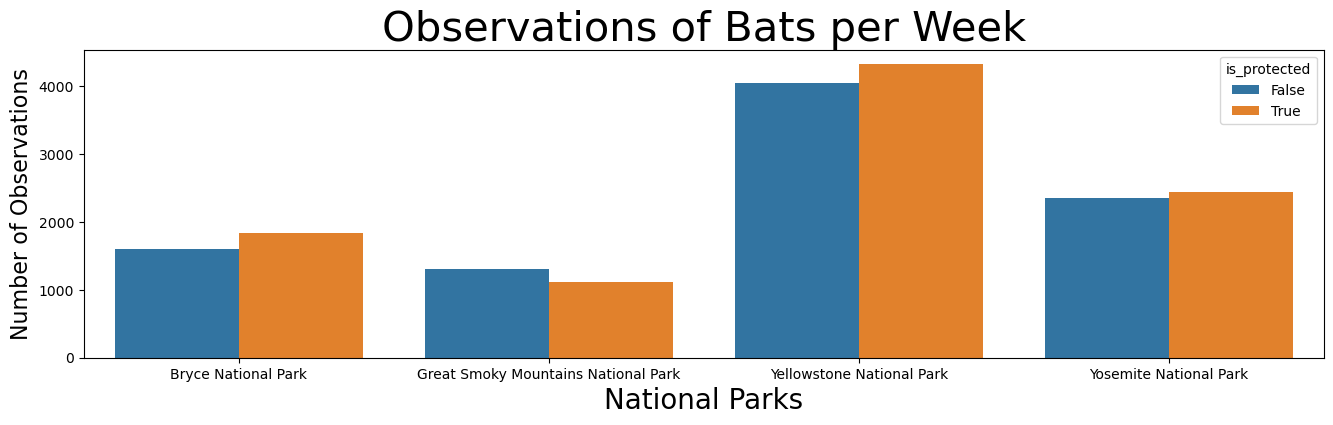

In [299]:
plt.figure(figsize=(16, 4))
sns.barplot(x=obs_by_park.park_name, y= obs_by_park.observations, hue=obs_by_park.is_protected)
plt.xlabel('National Parks', size = 20)
plt.ylabel('Number of Observations', size = 16)
plt.title('Observations of Bats per Week', size = 30)
plt.show()

##  49% of the bats observed are in a protected status. ##

### All parks have more protected bats than unprotected bats, except for Great Smoky Mountains National Park. ###

### Yellowstone National Park has the greatest amount of bats. ###

# Now lets look at Elk. #

In [302]:
Image(url="elk_bull.jpeg", width=300, height=300) 

## How many elk are there in these National parks ? ##

In [303]:
# create a dataframe with elk species.

In [304]:
species['is_elk'] = (species.common_names.str.contains("Elk|elk") & (species.category == "Mammal"))
print("There are " + str(sum(species.is_elk)) + " different elk species.")

There are 3 different elk species.


In [305]:
elk_observations = observations.merge(species[species.is_elk])
print(elk_observations.head(20))

   scientific_name                            park_name  observations  \
0      Alces alces               Yosemite National Park           161   
1      Alces alces            Yellowstone National Park           197   
2      Alces alces                  Bryce National Park           101   
3      Alces alces  Great Smoky Mountains National Park            44   
4   Cervus elaphus            Yellowstone National Park           225   
5   Cervus elaphus            Yellowstone National Park           225   
6   Cervus elaphus            Yellowstone National Park           270   
7   Cervus elaphus            Yellowstone National Park           270   
8   Cervus elaphus  Great Smoky Mountains National Park            60   
9   Cervus elaphus  Great Smoky Mountains National Park            60   
10  Cervus elaphus               Yosemite National Park           203   
11  Cervus elaphus               Yosemite National Park           203   
12  Cervus elaphus  Great Smoky Mountains National 

In [306]:
elk_by_park = elk_observations.groupby('park_name').observations.sum().reset_index()
print(elk_by_park)

                             park_name  observations
0                  Bryce National Park           467
1  Great Smoky Mountains National Park           366
2            Yellowstone National Park          1187
3               Yosemite National Park           919


In [307]:
print("There are " + str(sum(elk_observations.observations)) + " Elk observed each week at these 4 National Parks.")

There are 2939 Elk observed each week at these 4 National Parks.


### There wer 2939 Elk observed this week at these 4 National Parks. ###

In [308]:
Image(url="elk_sunset.jpeg", width=300, height=300) 

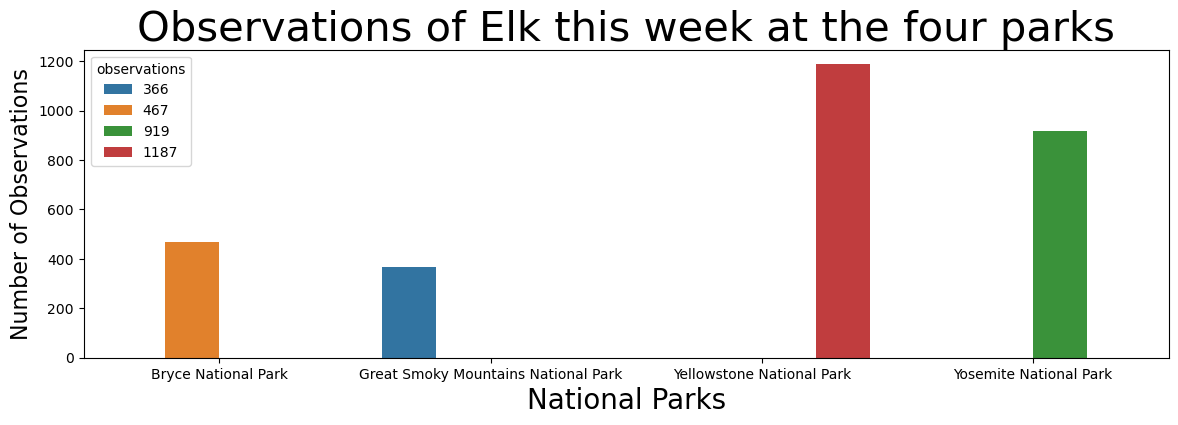

In [339]:
plt.figure(figsize=(14, 4))
sns.barplot(x=elk_by_park.park_name, y= elk_by_park.observations, hue=elk_by_park.observations)
plt.xlabel('National Parks', size = 20)
plt.ylabel('Number of Observations', size = 16)
plt.title('Observations of Elk this week at the four parks', size = 30)
plt.show()

## How many species of Elk are there? How many elk are endangered? ##

In [313]:
Image(url="elk_stuck_tire.jpeg", width=300, height=300) 

In [314]:
elk_by_park_protect = elk_observations.groupby(['is_elk', 'is_protected']).sum().reset_index()
elk_by_park_protect.is_protected

/var/folders/g4/hkwrz_hd06s7mxk8_15fr9jh0000gn/T/ipykernel_943/1606367186.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  elk_by_park_protect = elk_observations.groupby(['is_elk', 'is_protected']).sum().reset_index()


0    False
Name: is_protected, dtype: bool

### There are no elk in a protected status. ###

In [315]:
species['is_elk'] = (species.common_names.str.contains(r"[eE]lk")) & (species.category == "Mammal")

In [316]:
species[species.is_elk]

,category,scientific_name,common_names,conservation_status,is_protected,is_bat,is_elk
4,Mammal,Cervus elaphus,Wapiti Or Elk,Not Endangered,False,False,True
3015,Mammal,Alces alces,"Eurasian Elk, Moose",Not Endangered,False,False,True
3017,Mammal,Cervus elaphus,Rocky Mountain Elk,Not Endangered,False,False,True


In [317]:
species['is_elk'].value_counts()

False    5821
True        3
Name: is_elk, dtype: int64

### There are only 3 elk species in the National Parks, and none of them are endangered. ###

In [318]:
Image(url="elk_serious.jpeg", width=300, height=300) 

In [319]:
elk_observed = observations.merge(species[species.is_elk])
elk_observed

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat,is_elk
0,Alces alces,Yosemite National Park,161,Mammal,"Eurasian Elk, Moose",Not Endangered,False,False,True
1,Alces alces,Yellowstone National Park,197,Mammal,"Eurasian Elk, Moose",Not Endangered,False,False,True
2,Alces alces,Bryce National Park,101,Mammal,"Eurasian Elk, Moose",Not Endangered,False,False,True
3,Alces alces,Great Smoky Mountains National Park,44,Mammal,"Eurasian Elk, Moose",Not Endangered,False,False,True
4,Cervus elaphus,Yellowstone National Park,225,Mammal,Wapiti Or Elk,Not Endangered,False,False,True
5,Cervus elaphus,Yellowstone National Park,225,Mammal,Rocky Mountain Elk,Not Endangered,False,False,True
6,Cervus elaphus,Yellowstone National Park,270,Mammal,Wapiti Or Elk,Not Endangered,False,False,True
7,Cervus elaphus,Yellowstone National Park,270,Mammal,Rocky Mountain Elk,Not Endangered,False,False,True
8,Cervus elaphus,Great Smoky Mountains National Park,60,Mammal,Wapiti Or Elk,Not Endangered,False,False,True
9,Cervus elaphus,Great Smoky Mountains National Park,60,Mammal,Rocky Mountain Elk,Not Endangered,False,False,True


In [320]:
print("Number of Alces alces")

Number of Alces alces


In [321]:
print(np.where(elk_observations['scientific_name']=="Alces alces", elk_observations['observations'],0).sum())

503


In [322]:
print("Number of Cervus elephus")

Number of Cervus elephus


In [323]:
print(np.where(elk_observations['scientific_name']=="Cervus elaphus", elk_observations['observations'],0).sum())

2436


### There wer 503 Alces alces elk, and 2436 Cervus elaphus elk observed in these four parks this week. ###

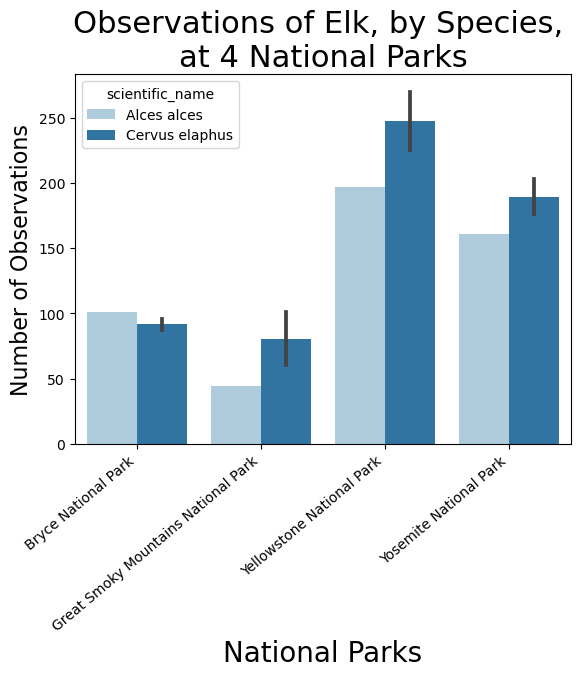

In [335]:
#park_labels = ['Bryce', 'Great Smoky Mountains', 'Yellowstone', 'Yosemite'].sorted(ascending=True)

plt.figure()
elk_observed.sort_values('park_name', ascending = True, inplace= True)

f = sns.barplot(data=elk_observed, y="observations", x="park_name", hue='scientific_name', palette="Paired")
plt.setp(f.get_xticklabels(), rotation=90)
plt.title("Observations of Elk, by Species, \nat 4 National Parks", size = 22)
plt.ylabel('Number of Observations', size = 16)
plt.xlabel('National Parks', size = 20)
plt.xticks(rotation=40, ha="right")
plt.show()

### Most elk are observed at Yellowstone and Yosemite National Parks (more than double of what is observed at Bryce and Great Smoky Mountains National Parks. ) ###

# Conclusion #

## The project was able to make several data visualizations and inferences about the various species in four of the National Parks that comprised this data set. ##


## It answer these questions : ##


## How many National Parks are there in this dataset? ##

### There are 4 parks in the data set: ###
- Bryce National Park
- Great Smoky Mountains National Park
- Yellowstone National Park
- Yosemite National Park

## How many species are there in this dataset? ##
- 5541


## How many of these species are endangered? ##
- 191

## How many species were observed in each category this week? ##
      
- Amphibian              80
- Bird                  521
- Fish                  127
- Mammal                214
- Nonvascular Plant     333
- Reptile                79
- Vascular Plant       4470

## What are the conservation statuses of each species, and how many of each species are in that conservation category? ##

- Endangered              16
- In Recovery              4
- Not Endangered        5633
- Species of Concern     161
- Threatened              10

### Of the species that have some level of protection, most of the species fall in to the "Species of Concern" ###
### conservation category. This is the lowest level of protection. ###


## What category of species is most protected? ##
- The largest percentile of species that are protected are mammals, with a close 2nd being birds. 

## Which category of species is most protected? ##

- Mammals and Birds had the highest percentage of being in protection. 
    

## How many bats were counted at each National Park each week? ##
- 18,992
    
## How many species of bats are there? ##
- 23

## How many bats are protected vs unprotected, for each National Park? ##
- 9708 protected vs 9284 unprotected.
- 51% are protected vs 49% unprotected.

## How many Elk are observed each week at these parks? ##
- 2939 in total

## How many species of Elk are there? ##
- 3

## How many of these Elk are endangered? ##
- 0



